# Assignment 1

## Loading data

In [1]:
from aa import DataLoader
from aa import extract_features
from aa import check_output
import torch
import tensorflow as tf

In [3]:
device = torch.device('cuda:0')

True

In [4]:
dataset = DataLoader(data_dir="../DDICorpus/DDICorpus/", device=device)

processing data
reading in data...
data read
creating validation set...
validation set ready
data processed


In [5]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
1,DDI-DrugBank.d436.s0,1,0,1,val
2,DDI-DrugBank.d436.s0,2,3,7,train
3,DDI-DrugBank.d436.s0,3,9,19,train
4,DDI-DrugBank.d436.s0,4,21,31,train
5,DDI-DrugBank.d436.s0,5,33,36,train


In [6]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
1,DDI-DrugBank.d519.s0,1,45,52
2,DDI-DrugBank.d519.s1,1,66,73
3,DDI-DrugBank.d519.s2,1,0,7
4,DDI-DrugBank.d519.s3,1,29,36
5,DDI-DrugBank.d519.s3,2,83,94


In [7]:
dataset.vocab[:15]

['No',
 'drug,',
 'nutritional',
 'supplement,',
 'food',
 'or',
 'herb',
 'interactions',
 'have',
 'yet',
 'been',
 'reported',
 'formal',
 'drug/drug',
 'interaction']

In [8]:
dataset.id2ner

{0: 'None', 1: 'brand', 2: 'drug', 3: 'group', 4: 'drug_n'}

In [9]:
dataset.max_sample_length

50

In [10]:
dataset.get_random_sample()

/home/guspfame@GU.GU.SE/ML/A1/lt2316-h20-aa/aa/data_loading.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_tokens["token"] = sample_tokens.loc[:,"token_id"].apply(decode_word)


'DRUG:Rifampin: Coadministration of DRUG:rifampin and BRAND:VIRACEPT resulted in an 82% decrease in DRUG:nelfinavir plasma A.C'

### Data Exploration

[Counter({0: 87960, 2: 6557, 3: 1418, 1: 1052, 4: 313}), Counter({0: 29378, 2: 2116, 3: 464, 1: 325, 4: 117}), Counter({0: 36946, 2: 2006, 3: 435, 1: 404, 4: 159})]
{0: 'None', 1: 'brand', 2: 'drug', 3: 'group', 4: 'drug_n'}


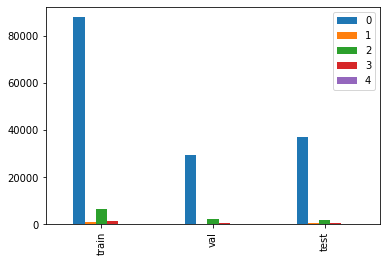

In [11]:
dataset.plot_split_ner_distribution()

### Labels

In [12]:
train_y, val_y, test_y = check_output(dataset.get_y())

## Extracting Features

In [13]:
train_X, val_X, test_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length,
                                                        id2word=dataset.id2word,
                                                        device=device
                                                        ))

train: torch.Size([1946, 50, 4])
val: torch.Size([648, 50, 4])
test: torch.Size([799, 50, 4])


## Bonus Part: Explore Some more

In [14]:
#uncomment the code below if you want to do bonus part

In [15]:
#dataset.plot_ner_per_sample_distribution()

In [16]:
#dataset.plot_sample_length_distribution()

In [17]:
#dataset.plot_ner_cooccurence_venndiagram()